## Aprendizagem
### Homework 1 - Decision Trees and Evaluation

---

#### I. Pen-and-paper

1. [4v] Draw the training confusion matrix.

---

In [1]:
import pandas as pd, numpy as np
from sklearn import metrics

# y_true = ["P", "P", "P", "P", "P", "P", "P", "P", "P", "P", "P", "P", "N", "N", "N", "N", "N", "N", "N", "N"]
# y_pred = ["P", "P", "P", "P", "N", "N", "N", "N", "P", "P", "P", "P", "P", "P", "P", "N", "N", "N", "N", "N"]

cm = [[8, 3], [4, 5]]
confusion = pd.DataFrame(cm, index=['Real P', 'Real N'], columns=['Predicted P', 'Predicted N'])
display(confusion)

,Predicted P,Predicted N
Real P,8,3
Real N,4,5


2. [3v] Identify the training F1 after a post-pruning of the given tree under a maximum depth of 1.

3. [2v] Identify two different reasons as to why the left tree path was not further decomposed.

---

O caminho esquerdo da árvore não foi mais desenvolvido devido a duas principais razões:
 - para evitar overfitting, pois sendo o data split não estatisticamente significante, ao pararmos a expansão do nó, evitamos a produção de filhos que se baseiem em samples muito pequenos;
 - pois a expansão do nó não respeitaria o valor mínimo de diminuição do seu nível de impureza. 


4. [3v] Compute the information gain of variable y1.

---

#### II. Programming

1. [6v] Using sklearn, apply a stratified 70-30 training-testing split with a fixed seed (random_state=1), and assess in a single plot the training and testing accuracies of a decision tree with no depth limits (and remaining default behavior) for a varying number of selected features in {5,10,40,100,250,700}. Feature selection should be performed before decision tree learning considering the discriminative power of the input variables according to mutual information criterion (mutual_info_classif).

---

In [2]:
# Import wall
import pandas as pd
import numpy as np
from sklearn import metrics, datasets, tree
from scipy.io.arff import loadarff
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_classif, SelectKBest
import matplotlib.pyplot as plt

In [3]:

# Reads the 'pd_speech.arff' file and creates the disered dataframe.
data = loadarff('pd_speech.arff')
df = pd.DataFrame(data[0])

# Discretization of the output variable 'class' (B1 -> 1).
df['class'] = df['class'].str.decode('utf-8')

# Defines the X and Y data sets:
# - X: all the input values;
# - Y: the output values (variable 'class').
x = df.drop("class", axis=1)
y = np.ravel(df['class'])

num_features = [5, 10, 40, 100, 250, 700]
acc_train = []
acc_test = []


for n in num_features:
    
    # Feature selection:
    #  - selects the k best variables based on the 
    #    mutual info classifier (information gain).
    selector = SelectKBest(mutual_info_classif, k=n)

    # Gets the sub-set to be used on this iteration, 
    # based on the selector created above.
    x_reduced = selector.fit_transform(x, y)

    # 70-30 training-testing split.
    x_train, x_test, y_train, y_test = train_test_split(x_reduced, y, test_size = 0.3, random_state=1)

    # Trains the decision tree on the training sets.
    decision_tree = tree.DecisionTreeClassifier()
    predictor = decision_tree.fit(x_train, y_train)

    # Gets the predicted values for both the train 
    # and test samples.
    y_train_pred = predictor.predict(x_train)
    y_test_pred = predictor.predict(x_test)

    # Test model performance:
    # - calculates the accuracy of both samples,
    #   train and test.
    acc_train += [round(metrics.accuracy_score(y_train, y_train_pred), 2)]
    acc_test += [round(metrics.accuracy_score(y_test, y_test_pred), 2)]

print(acc_train)
print(acc_test)


[1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
[0.75, 0.75, 0.84, 0.81, 0.82, 0.79]


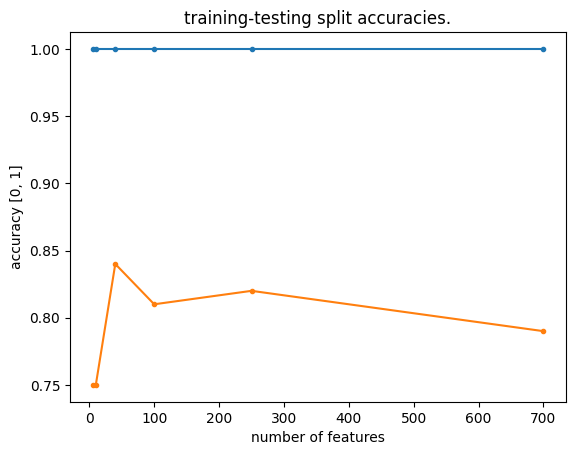

In [6]:
# Ploting the trainig-testing accuracies.
plt.plot(num_features, acc_train, marker = '.', label = "training")
plt.plot(num_features, acc_test, marker = '.', label = "testing")
plt.title("training-testing split accuracies.")
plt.ylabel("accuracy [0, 1]")
plt.xlabel("number of features")
plt.show()

2) [2v] Why training accuracy is persistently 1? Critically analyze the gathered results.

---

Pela sua definição, accuracy corresponde ao número de previsões corretas a dividir pelo número total de previsões. \
No caso concreto da accuracy de treino, todas as previsões serão corretas (dando sempre accuracy = 1), uma vez que são utilizadas tanto para treinar como para testar o próprio modelo usado no training set (70%). \
Da análise dos resultados obtidos, podemos concluir que os modelos criados se adequam ao nosso dataset, com uma accuracy média de 80% (com um training-testing split 70-30).